In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './052018_Plate2/'

path_cyt = folder + 'Cytoplasm_May2018_2.xlsx'
path_nuc = folder + 'Nucleus_May2018_2.xlsx'

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
       
        'BT+AR22,Cntrl(re,c2-4)',
        'BT+AR22,30nM(re,c5-7)',
        'BT+AR22,300nM(re,c8-10)',
        
        'BT+hMSC,Cntrl(rf,c2-4)',
        'BT+hMSC,30nM(rf,c5-7)',
        'BT+hMSC,300nM(rf,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t))
    df = pd.concat(dt, ignore_index=True)
    df['Row'] = df['Well'].apply(lambda x: x[0])
    return df

def plot_grid(df, w, h, title):
    fig, axes = plt.subplots(w, h, figsize=(24, 36))
    cols = df_cyt.columns[4:18]

    for k in range(w * h):
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False,
                       ax=axes[(k - 4) // h][(k - 4) % h]).set_title(title)
    plt.show()

def plot_col(df, h, title):
    cols = df.columns[4:18]
    for k in range(h):
        plt.gcf().set_size_inches(8, 8) 
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False)
        plt.title(title)  
        plt.show()

In [2]:
df_cyt = concat_df(path_cyt)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5),Row
0,11100010020,B02,1,0,7.9e+05,168485.4,115635.7,259947.4,94347.9,58311.6,50382.4,73730.0,48681.8,48307.4,33650.6,40738.3,54006.1,39604.8,B
1,11100020011,B02,1,0,7.7e+05,74462.7,66390.9,188129.5,70622.5,33918.0,29749.2,59214.9,51360.5,22255.7,16048.4,18619.3,29313.7,18391.7,B
2,11100030022,B02,1,0,2.7e+06,427953.1,191264.9,249321.8,135855.4,58219.0,56154.2,121266.5,60755.1,49693.9,38877.2,33284.6,66032.7,41370.0,B
3,11100040011,B02,1,0,3.4e+05,64204.7,110122.9,125686.5,59472.2,23581.0,17910.3,18721.2,27914.5,19758.7,13533.6,15094.9,23274.5,14658.5,B
4,11100050026,B02,1,0,1.5e+06,196596.0,325263.5,540408.3,192670.9,87410.4,59636.0,90039.9,100308.1,74684.3,45509.0,52551.7,77627.0,43702.2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314858,59907841034,F10,9,2,7.9e+04,13000.4,64874.6,14465.8,0.0,0.0,0.0,0.0,0.0,12506.2,10550.9,8431.7,0.0,0.0,F
314859,59907851034,F10,9,2,3.1e+05,46294.3,128173.3,35807.9,0.0,0.0,0.0,0.0,0.0,30810.5,18730.5,12485.0,0.0,0.0,F
314860,59907861035,F10,9,2,5.4e+04,12499.5,18700.8,11698.0,0.0,0.0,0.0,0.0,0.0,9295.2,8153.3,19008.1,0.0,0.0,F
314861,59907871036,F10,9,2,3.7e+05,14982.9,85115.5,98166.8,0.0,0.0,0.0,0.0,0.0,15840.4,6009.5,9470.1,0.0,0.0,F


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314863 entries, 0 to 314862
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         314863 non-null  int64  
 1   Well                            314863 non-null  object 
 2   Field                           314863 non-null  int64  
 3   Group                           314863 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        314863 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  314863 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            314863 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       314863 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          314863 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            314863 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         314863 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          314863 non-null  float64
 12  Vimentin (Cycle 

In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

13300140031    1
46311010923    1
54404430434    1
35202900577    1
56304720310    1
              ..
49602510317    1
14104530411    1
46402250222    1
46709480937    1
58705190653    1
Name: Cell ID, Length: 314863, dtype: int64

In [5]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[4:18]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5)
count,3.1e+05,3.1e+05,3.1e+05,3.1e+05,314863.0,3.1e+05,3.1e+05,314863.0,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05
mean,7.1e+05,6.3e+04,1.4e+05,7.6e+04,35410.3,2.5e+04,2.1e+04,19785.4,2.4e+04,2.4e+04,2.4e+04,2.0e+04,3.5e+04,1.8e+04
std,5.8e+05,9.9e+04,1.3e+05,1.1e+05,31579.0,4.5e+04,4.3e+04,20581.0,3.8e+04,1.7e+04,2.6e+04,1.2e+04,5.3e+04,1.8e+04
min,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0,0.0e+00,0.0e+00,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.8e+05,2.3e+04,5.8e+04,2.1e+04,19251.0,1.6e+04,1.5e+04,9009.9,1.6e+04,1.8e+04,1.4e+04,1.5e+04,2.5e+04,1.4e+04
50%,5.4e+05,3.1e+04,9.2e+04,3.0e+04,24691.6,2.0e+04,1.9e+04,14802.0,1.9e+04,2.2e+04,1.8e+04,1.8e+04,3.1e+04,1.7e+04
75%,8.3e+05,5.4e+04,1.6e+05,8.3e+04,38095.7,2.6e+04,2.3e+04,21880.4,2.5e+04,2.7e+04,2.7e+04,2.3e+04,3.9e+04,2.1e+04
max,1.5e+07,2.8e+06,7.7e+06,2.2e+06,855250.0,5.9e+06,1.6e+07,777235.8,7.5e+06,4.3e+06,3.6e+06,1.1e+06,9.6e+06,4.5e+06


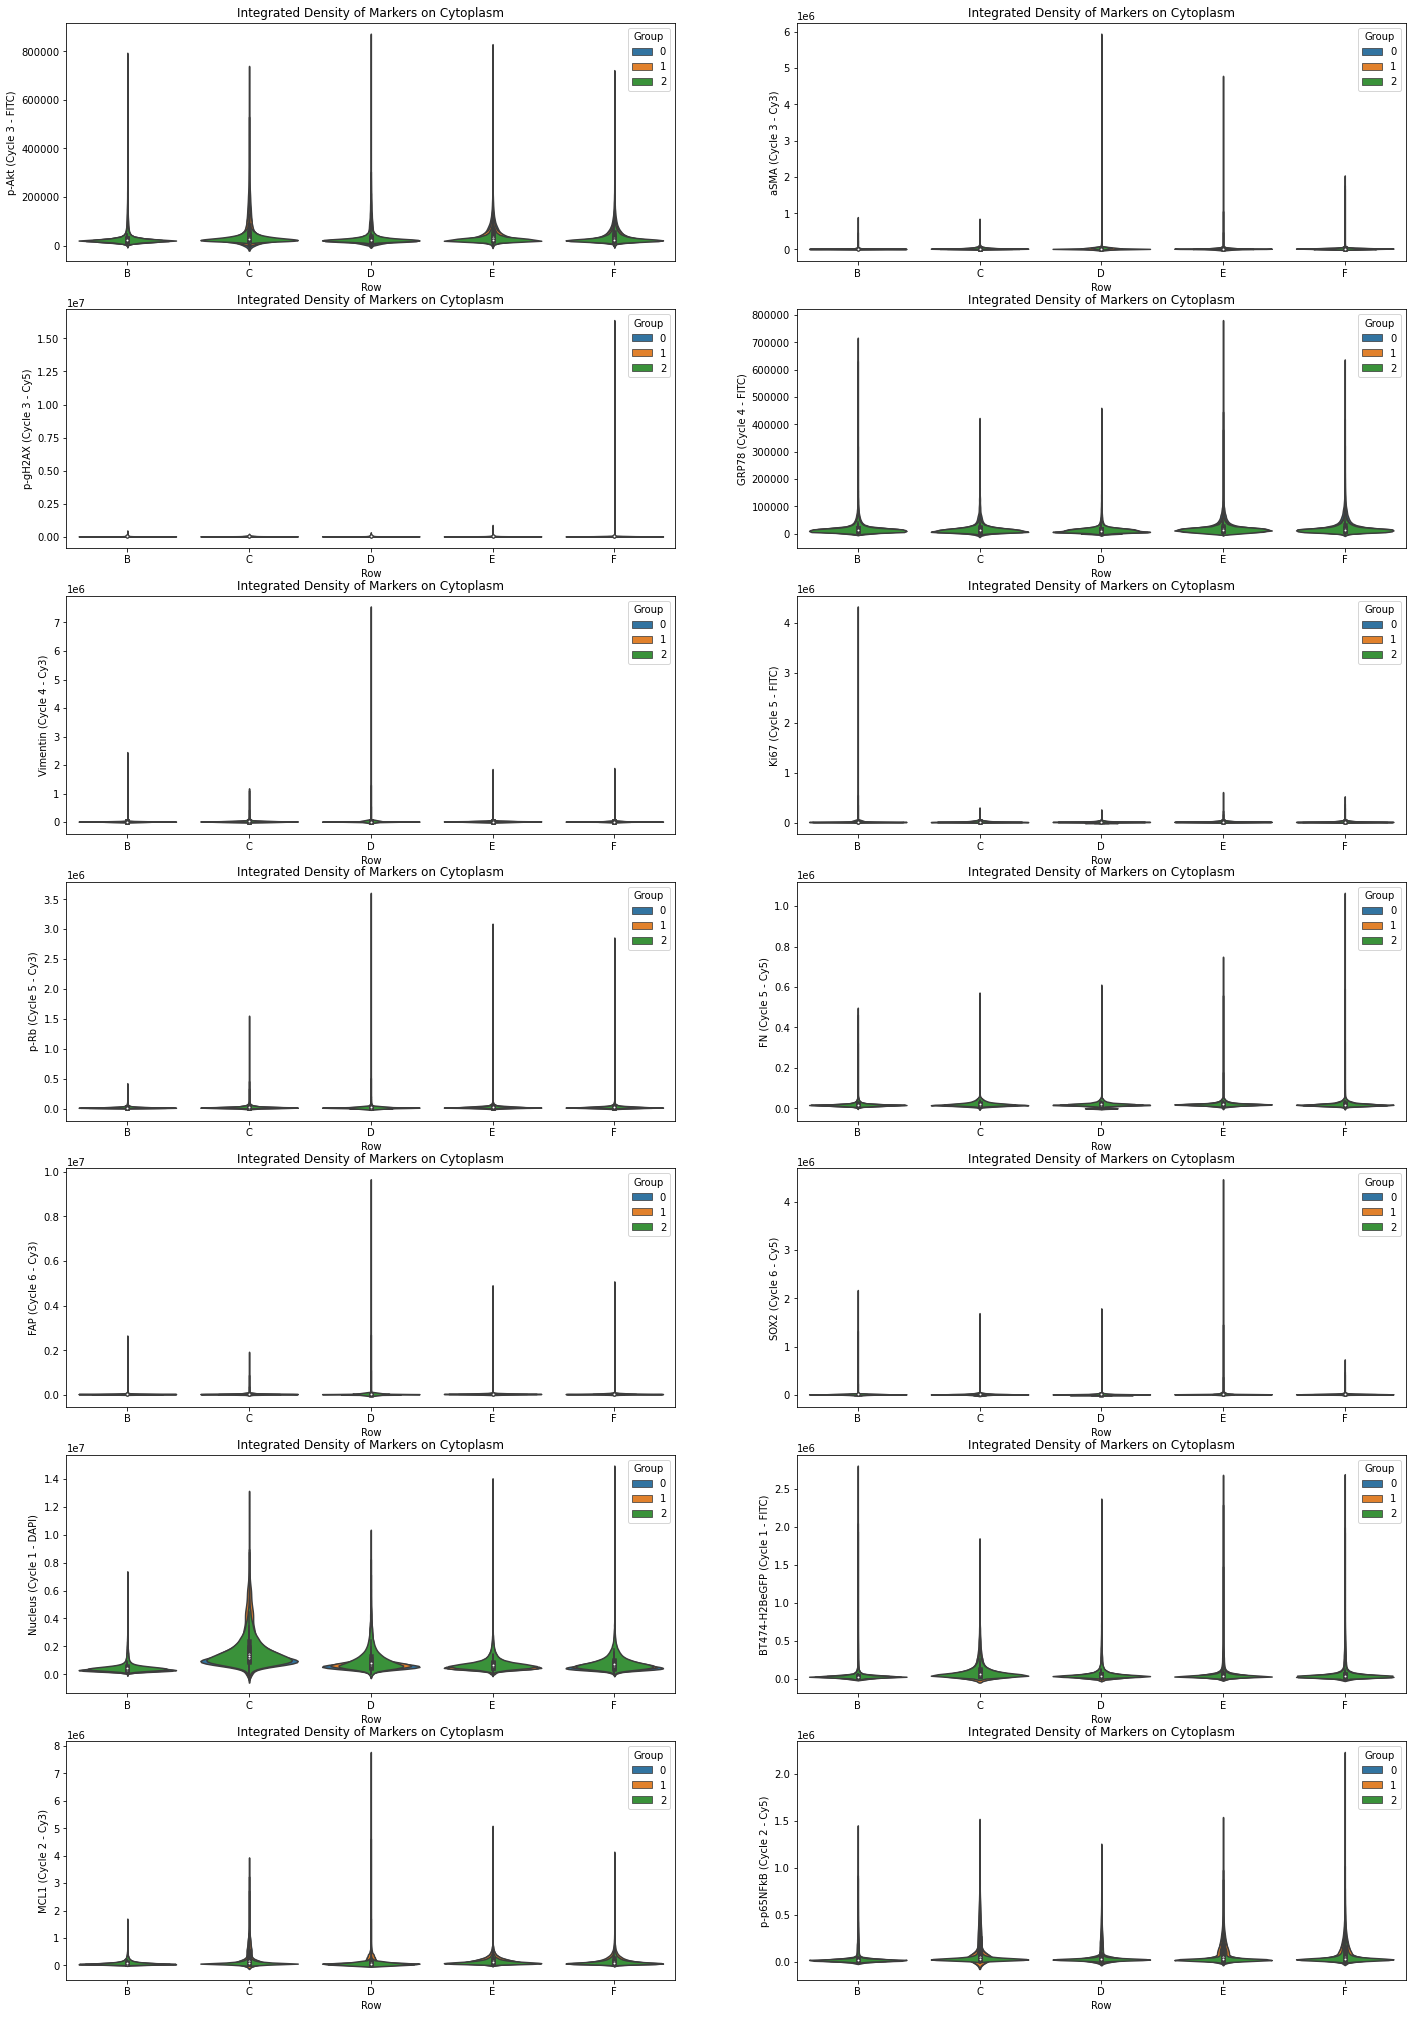

In [6]:
# Plot a grid of plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Cytoplasm'
plot_grid(df_cyt, 7, 2, title)

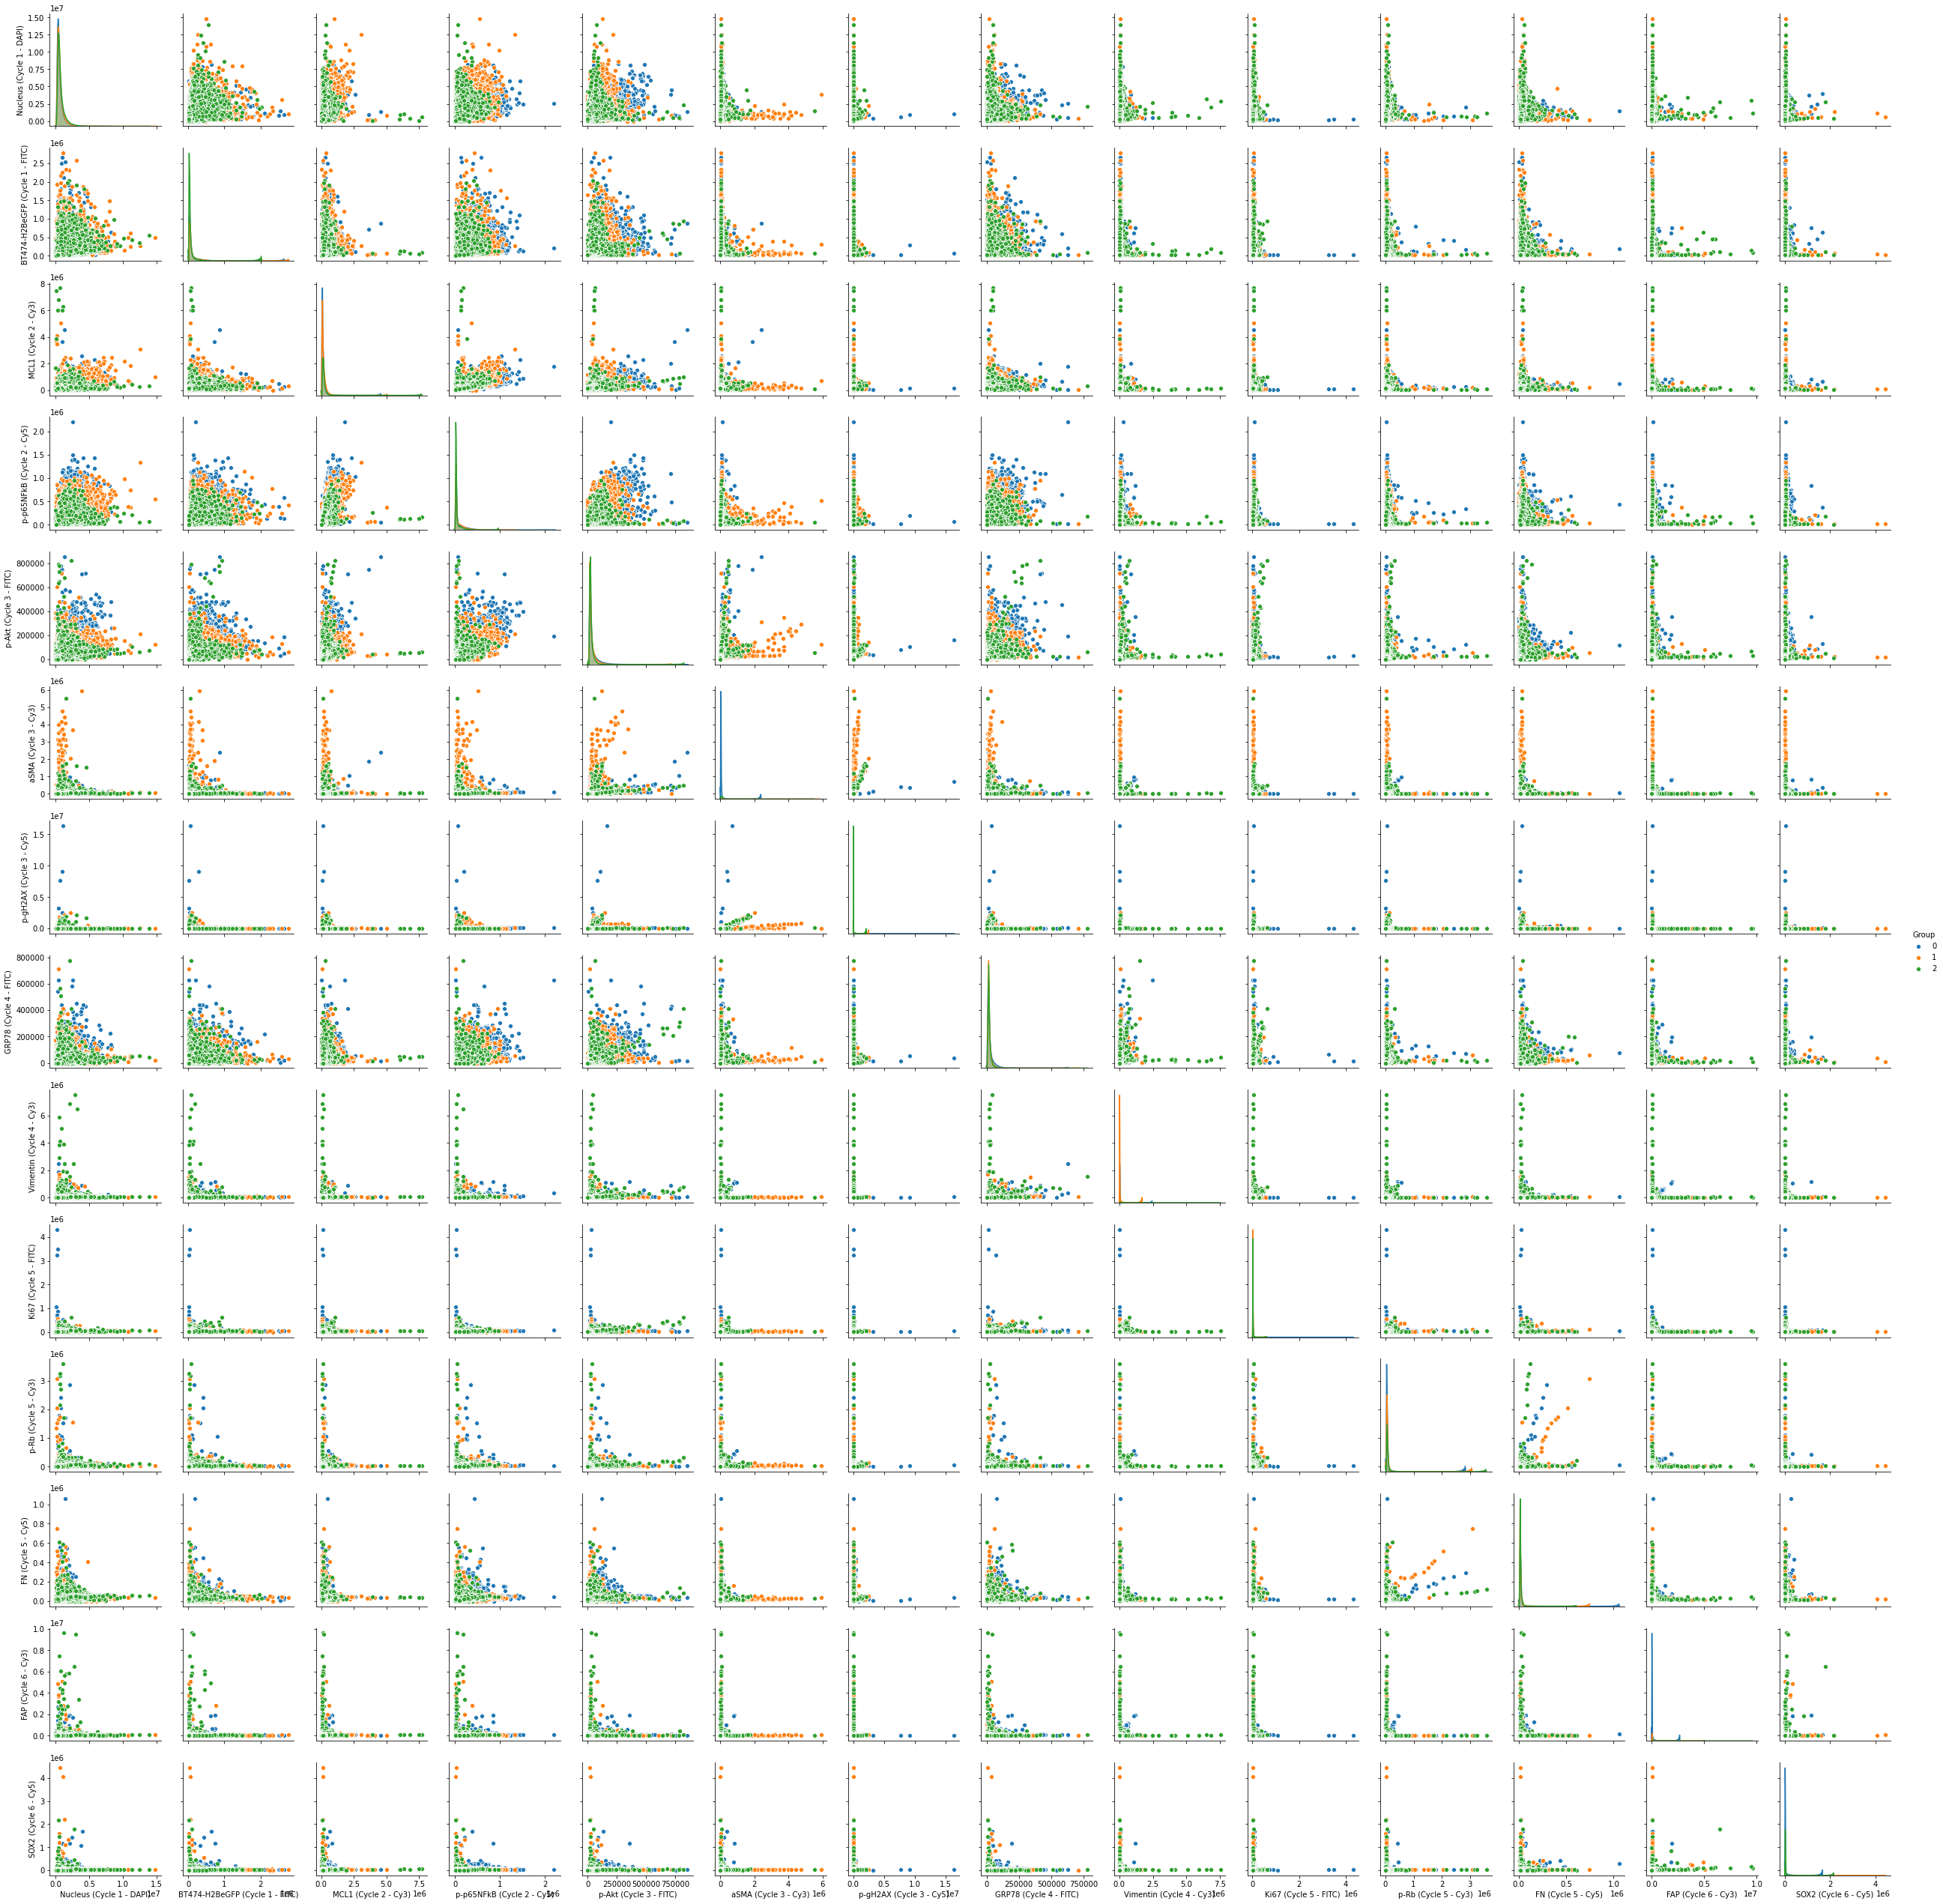

In [7]:
sns.pairplot(df_cyt, vars=df_cyt.columns[4:18], hue='Group');

In [8]:
df_nuc = concat_df(path_nuc)
print('*** Nucleus Dataset:')
df_nuc

*** Nucleus Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5),Row
0,11100010020,B02,1,0,1.4e+06,4.2e+05,2.2e+05,5.7e+05,127441.5,95358.2,73654.4,144225.2,58232.6,65702.4,43000.9,60514.8,67956.6,44798.4,B
1,11100020011,B02,1,0,5.2e+05,3.9e+04,6.4e+04,1.8e+05,43756.6,19365.6,18300.0,37505.2,34929.2,14146.6,8702.6,12800.0,18870.6,11069.7,B
2,11100030022,B02,1,0,7.1e+06,1.2e+06,1.2e+06,1.8e+06,532322.2,213413.7,173399.6,332572.8,160260.8,128780.4,88115.1,77755.2,151668.6,92550.5,B
3,11100040011,B02,1,0,2.4e+05,4.9e+04,6.7e+04,7.0e+04,31033.0,12634.5,9327.5,11078.2,13300.1,13262.7,8112.5,9030.3,14252.7,7924.0,B
4,11100050026,B02,1,0,3.7e+06,5.1e+05,6.4e+05,1.1e+06,429009.3,185927.1,117988.4,314919.7,298979.2,142851.4,82947.1,97510.5,135205.0,79543.3,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314858,59907841034,F10,9,2,6.5e+04,6.4e+03,3.9e+04,7.2e+03,0.0,0.0,0.0,0.0,0.0,8027.6,5106.1,3402.1,0.0,0.0,F
314859,59907851034,F10,9,2,5.0e+05,5.4e+04,1.0e+05,3.4e+04,0.0,0.0,0.0,0.0,0.0,26499.2,15972.0,13500.5,0.0,0.0,F
314860,59907861035,F10,9,2,4.8e+04,6.6e+03,8.1e+03,7.1e+03,0.0,0.0,0.0,0.0,0.0,5028.0,3553.2,21133.3,0.0,0.0,F
314861,59907871036,F10,9,2,4.1e+05,7.0e+03,3.9e+04,4.7e+04,0.0,0.0,0.0,0.0,0.0,8616.8,5559.5,5855.8,0.0,0.0,F


In [9]:
# All columns in the Nucleus dataset's information
df_nuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314863 entries, 0 to 314862
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         314863 non-null  int64  
 1   Well                            314863 non-null  object 
 2   Field                           314863 non-null  int64  
 3   Group                           314863 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        314863 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  314863 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            314863 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       314863 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          314863 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            314863 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         314863 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          314863 non-null  float64
 12  Vimentin (Cycle 

In [10]:
# Check if duplicate ID exists in Nucleus dataset
df_nuc['Cell ID'].value_counts()

13300140031    1
46311010923    1
54404430434    1
35202900577    1
56304720310    1
              ..
49602510317    1
14104530411    1
46402250222    1
46709480937    1
58705190653    1
Name: Cell ID, Length: 314863, dtype: int64

In [11]:
# Nucleus Markers' statistics
df_nuc[df_nuc.columns[4:18]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cycle 6 - Cy5)
count,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05,3.1e+05
mean,1.3e+06,1.1e+05,1.5e+05,1.1e+05,4.4e+04,2.8e+04,2.3e+04,3.7e+04,2.8e+04,2.5e+04,2.4e+04,2.1e+04,3.5e+04,1.8e+04
std,1.9e+06,3.4e+05,3.6e+05,2.7e+05,7.9e+04,6.6e+04,6.5e+04,8.5e+04,5.7e+04,2.6e+04,3.9e+04,2.5e+04,7.0e+04,2.9e+04
min,0.0e+00,3.2e+03,0.0e+00,2.0e+03,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,4.3e+05,1.5e+04,2.9e+04,1.4e+04,1.4e+04,1.1e+04,1.1e+04,7.0e+03,1.1e+04,1.2e+04,9.4e+03,1.0e+04,1.7e+04,9.1e+03
50%,7.6e+05,2.4e+04,5.6e+04,2.5e+04,2.1e+04,1.6e+04,1.5e+04,1.3e+04,1.6e+04,1.7e+04,1.5e+04,1.4e+04,2.4e+04,1.3e+04
75%,1.4e+06,5.4e+04,1.3e+05,7.2e+04,4.0e+04,2.7e+04,2.4e+04,2.6e+04,2.7e+04,2.7e+04,2.6e+04,2.2e+04,3.8e+04,2.0e+04
max,4.3e+07,1.2e+07,3.4e+07,6.3e+06,2.2e+06,8.0e+06,2.7e+07,3.2e+06,1.1e+07,2.8e+06,6.8e+06,2.7e+06,1.4e+07,7.0e+06


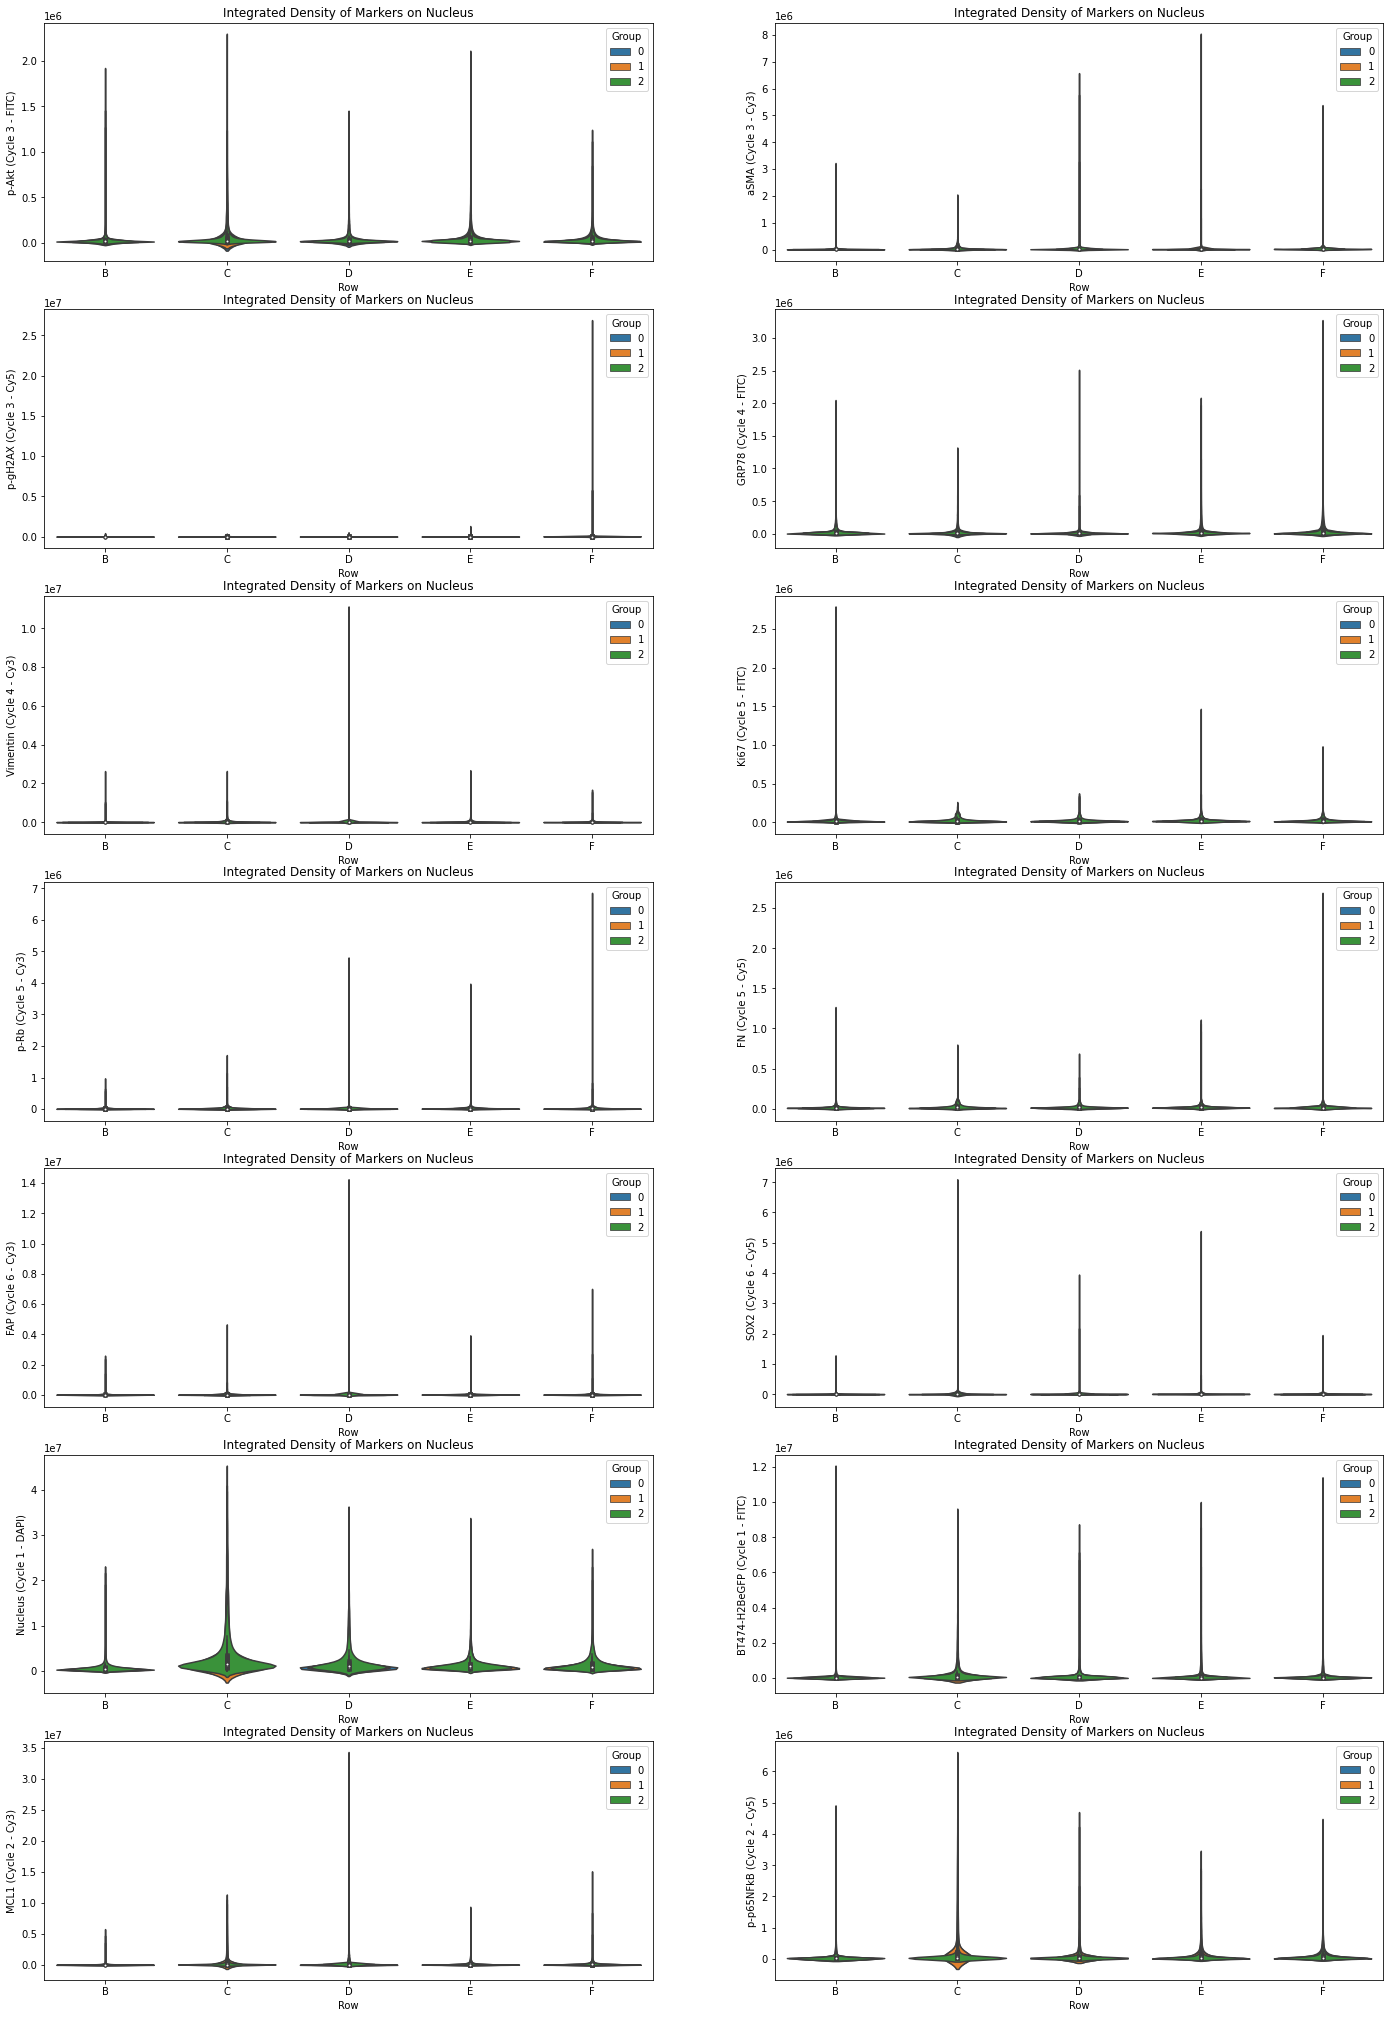

In [12]:
title = 'Integrated Density of Markers on Nucleus'
plot_grid(df_nuc, 7, 2, title)

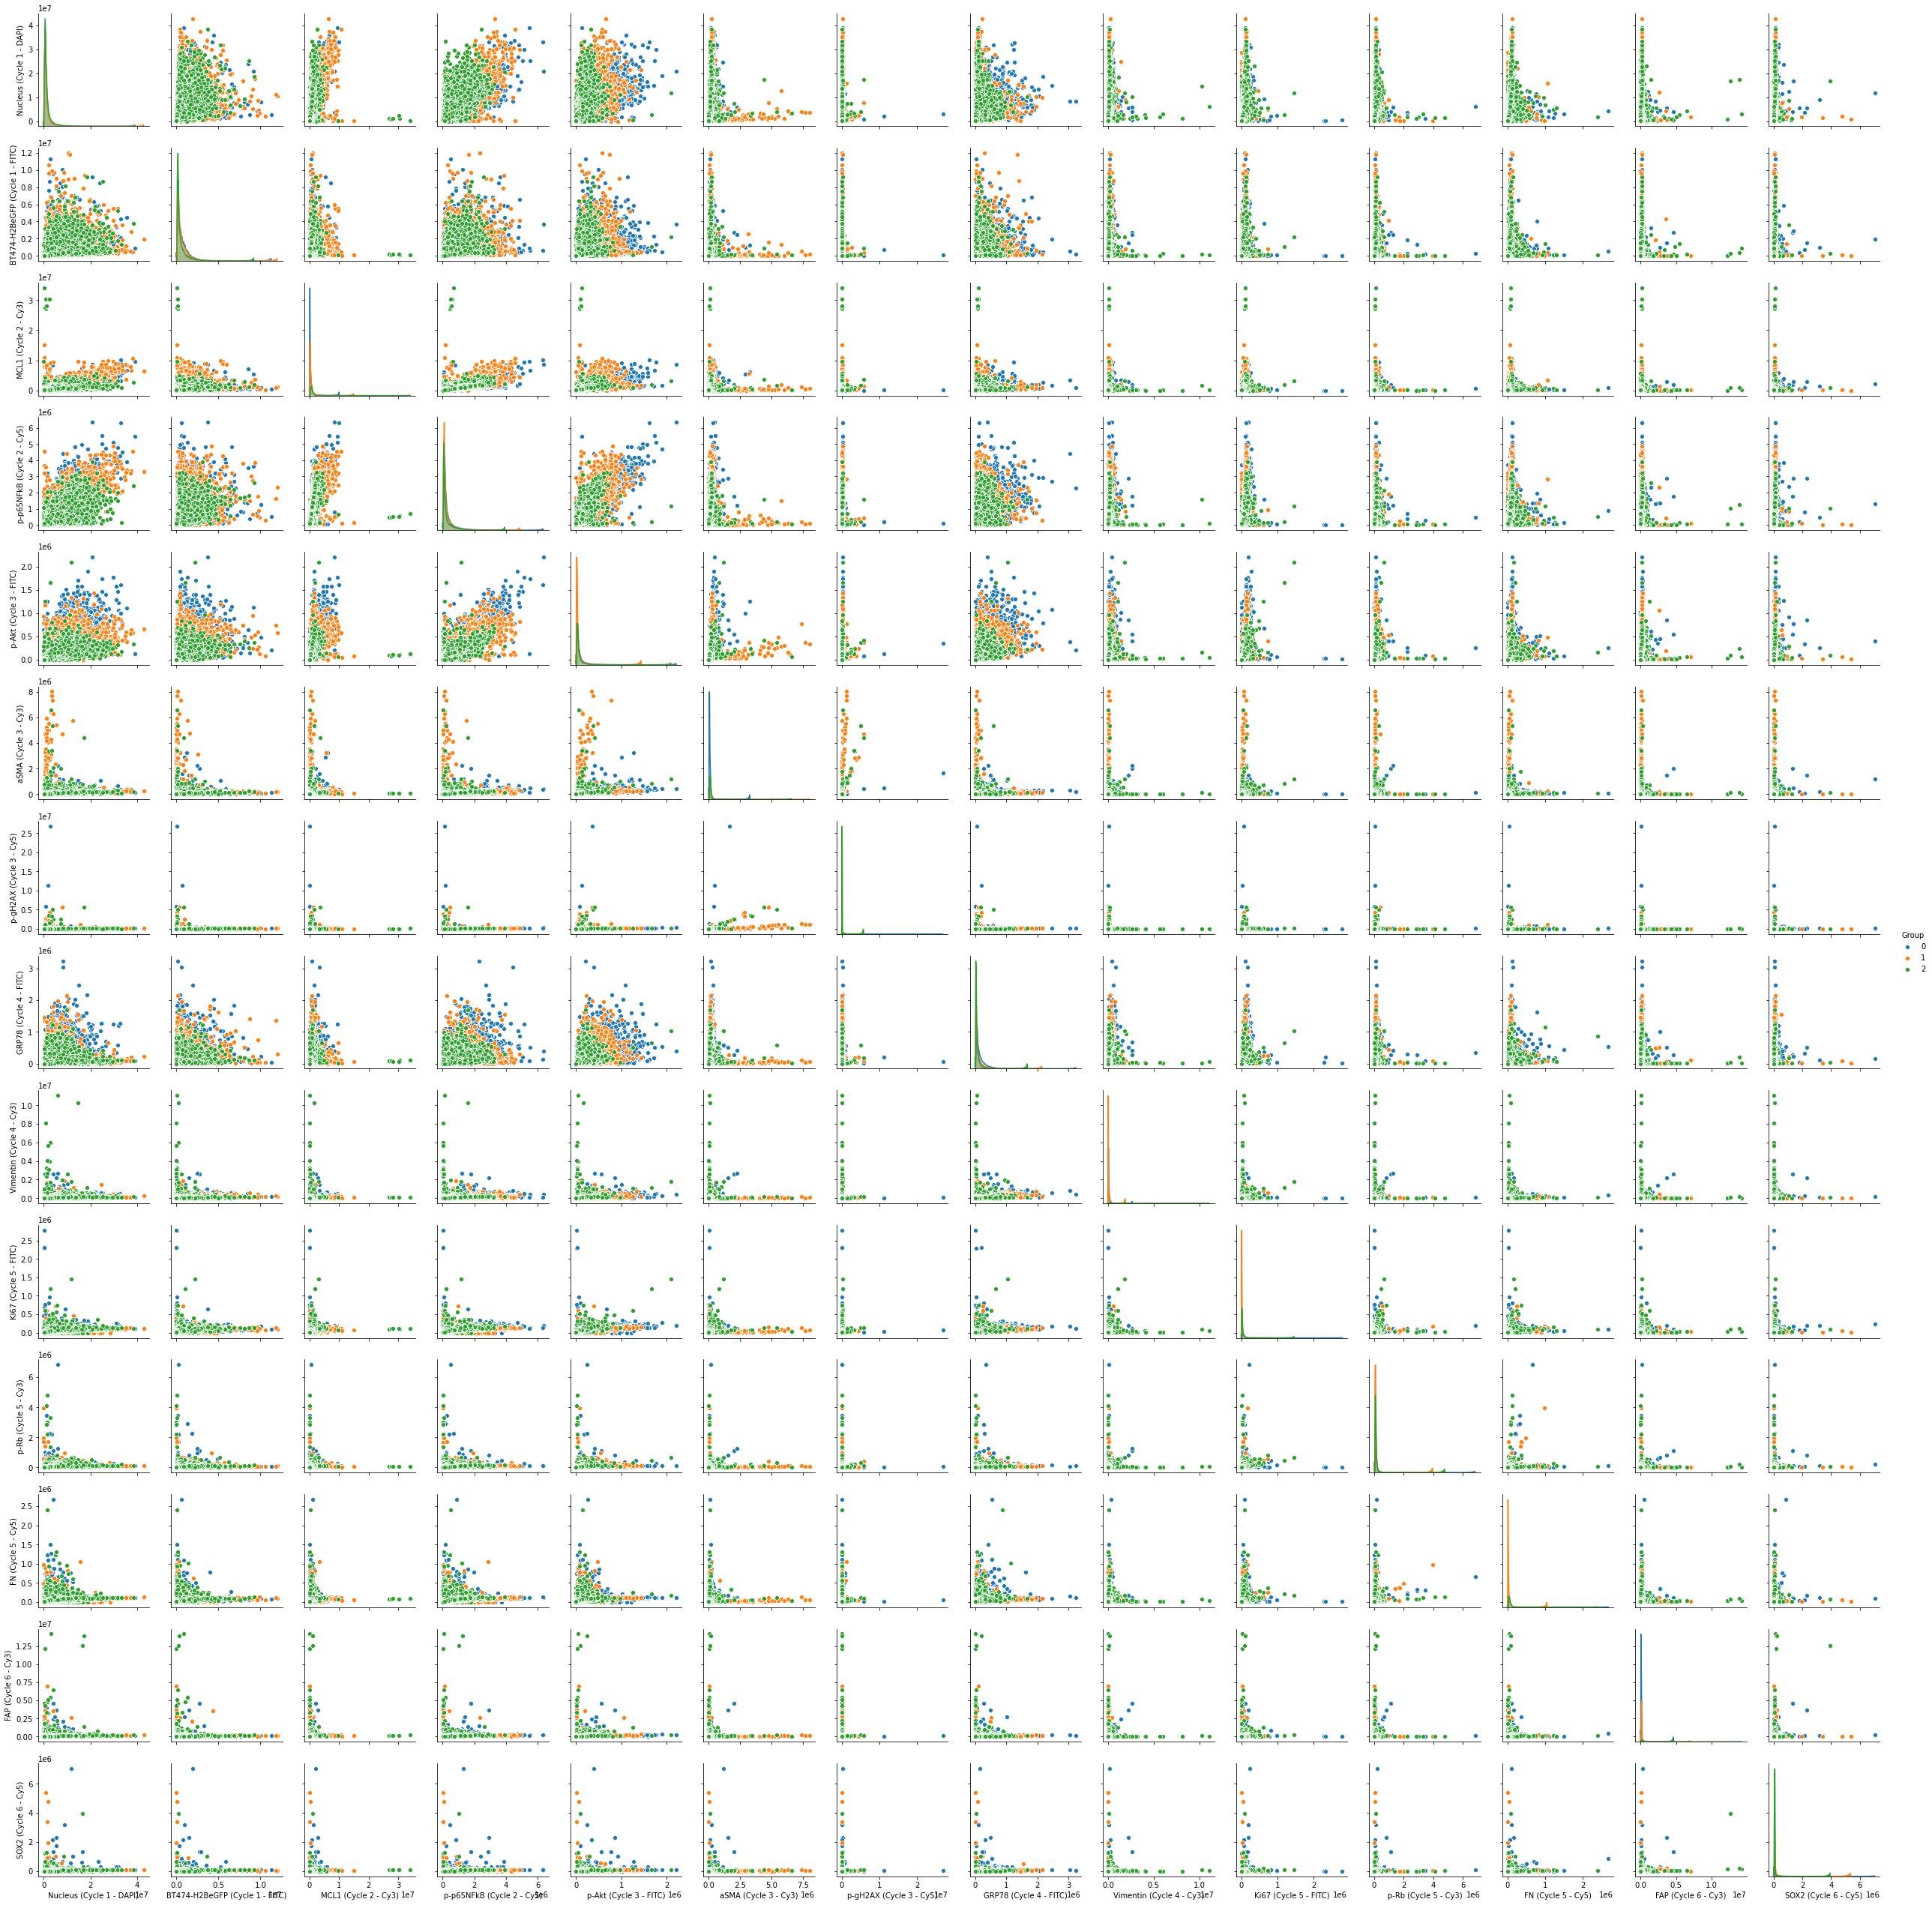

In [13]:
sns.pairplot(df_nuc, vars=df_nuc.columns[4:18], hue='Group');